# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('baseball.csv')# loading our dataset

In [4]:
data.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88


In [5]:
data.shape # checking the dimension

(30, 17)

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [6]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
data.isnull().sum().sum()

0

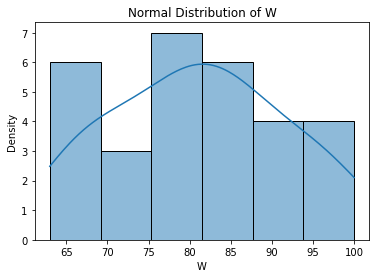

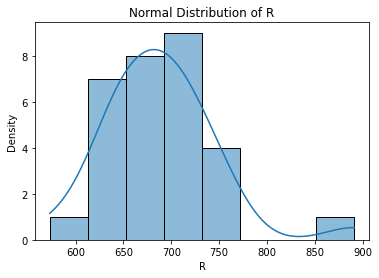

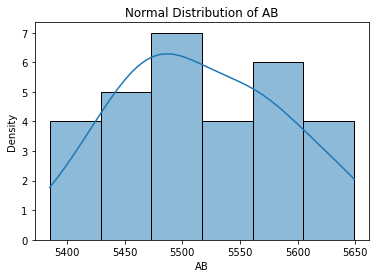

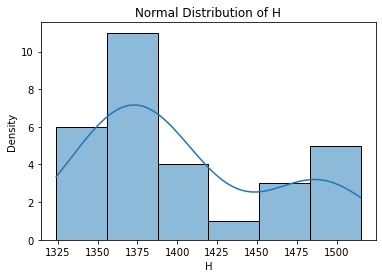

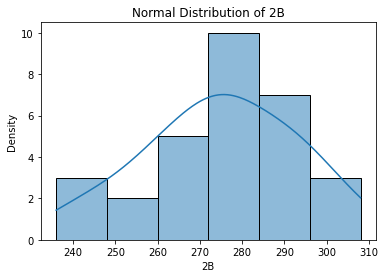

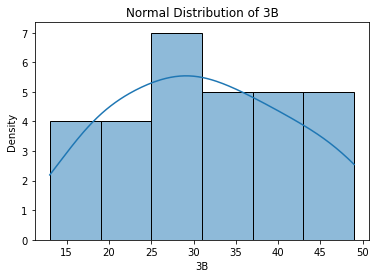

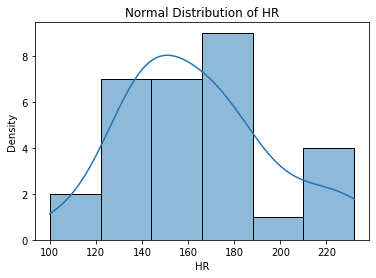

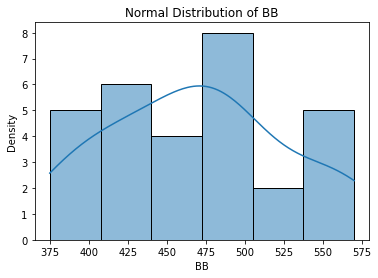

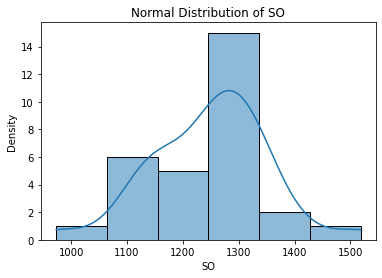

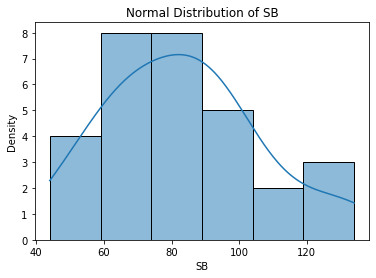

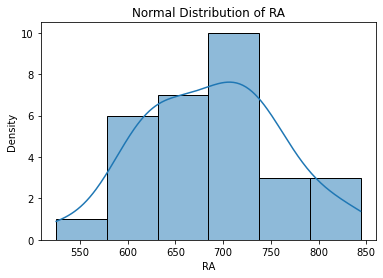

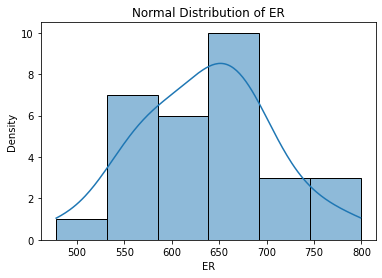

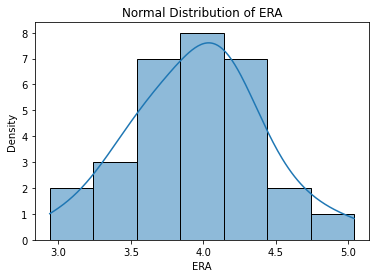

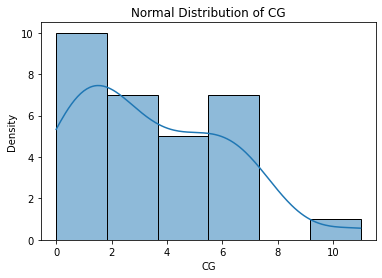

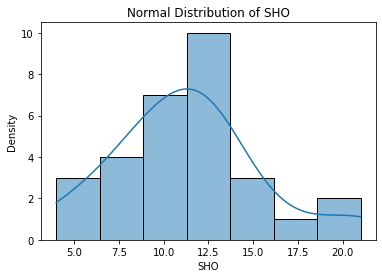

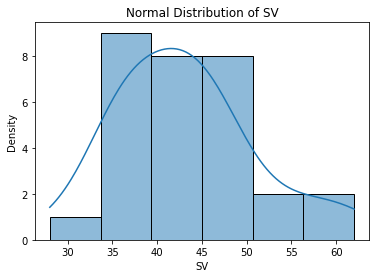

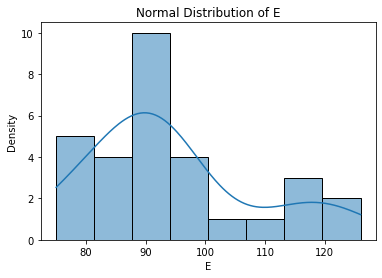

In [8]:
# Iterate over each feature/column
for column in data.columns:
    feature = data[column]

    # Plot the normal distribution graph
    sns.histplot(feature, kde=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Normal Distribution of ' + column)
    plt.show()


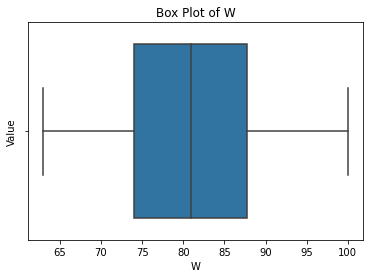

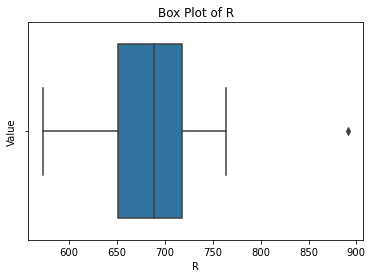

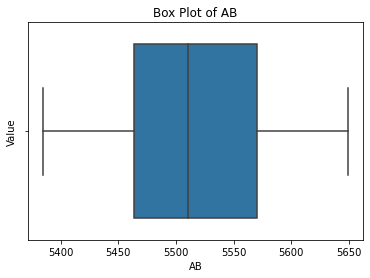

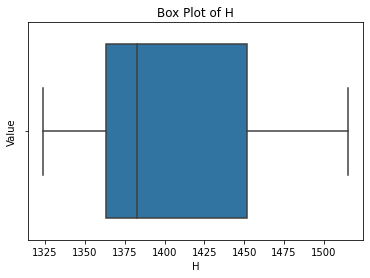

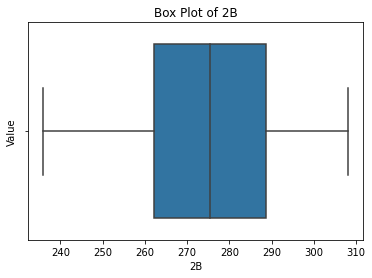

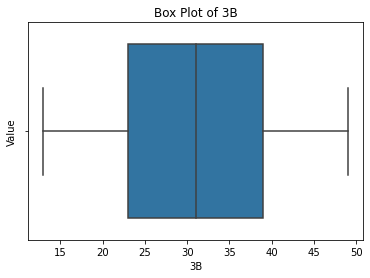

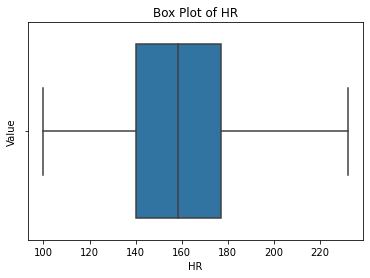

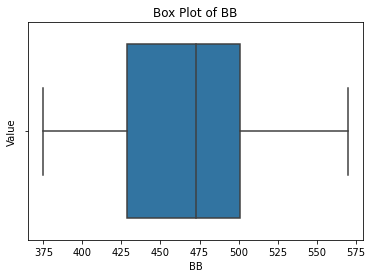

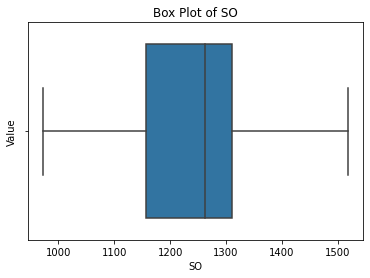

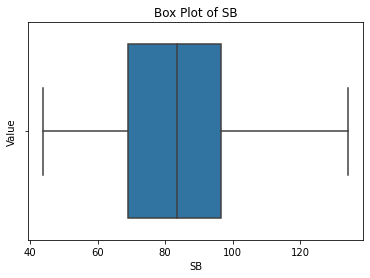

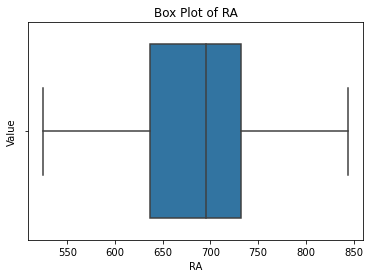

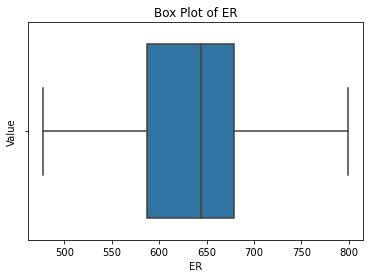

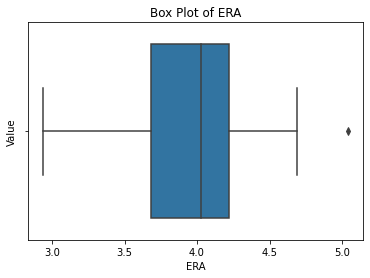

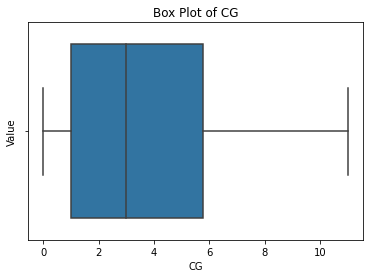

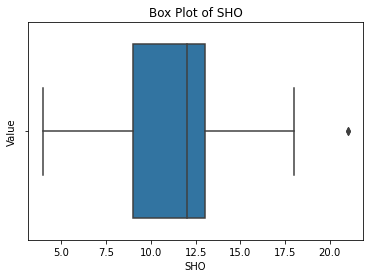

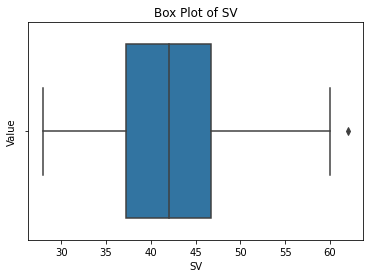

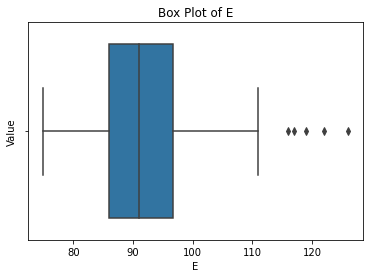

In [34]:

for column in data.columns:
    feature = data[column]

    # Plot the box plot
    sns.boxplot(x=feature)
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Box Plot of ' + column)
    plt.show()


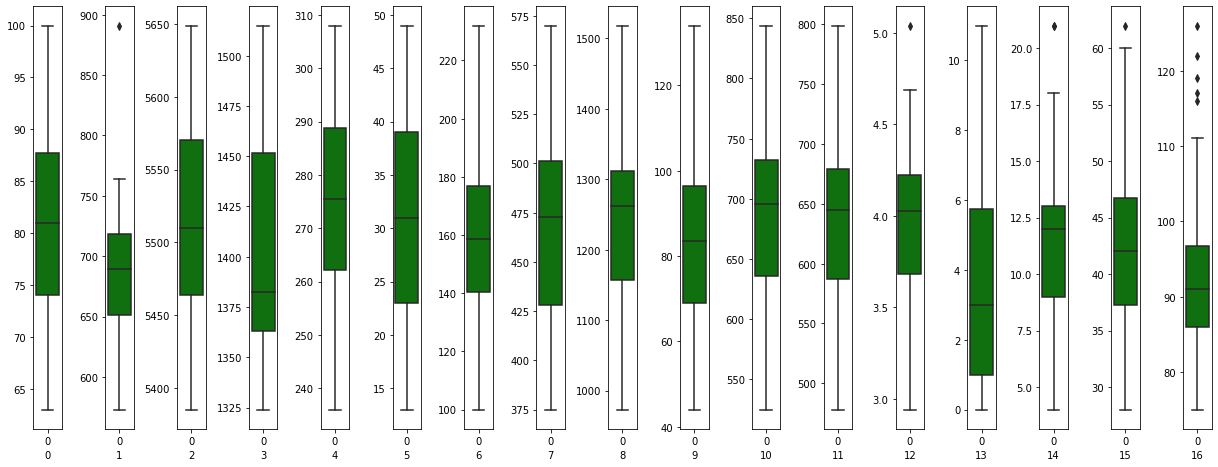

In [55]:
collist = data.columns.values
ncol= 30
nrows = 14
plt.figure(figsize = (ncol, 3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = data[collist[i]], color = 'green', orient = 'v')
    plt.xlabel(i)
    plt.tight_layout()

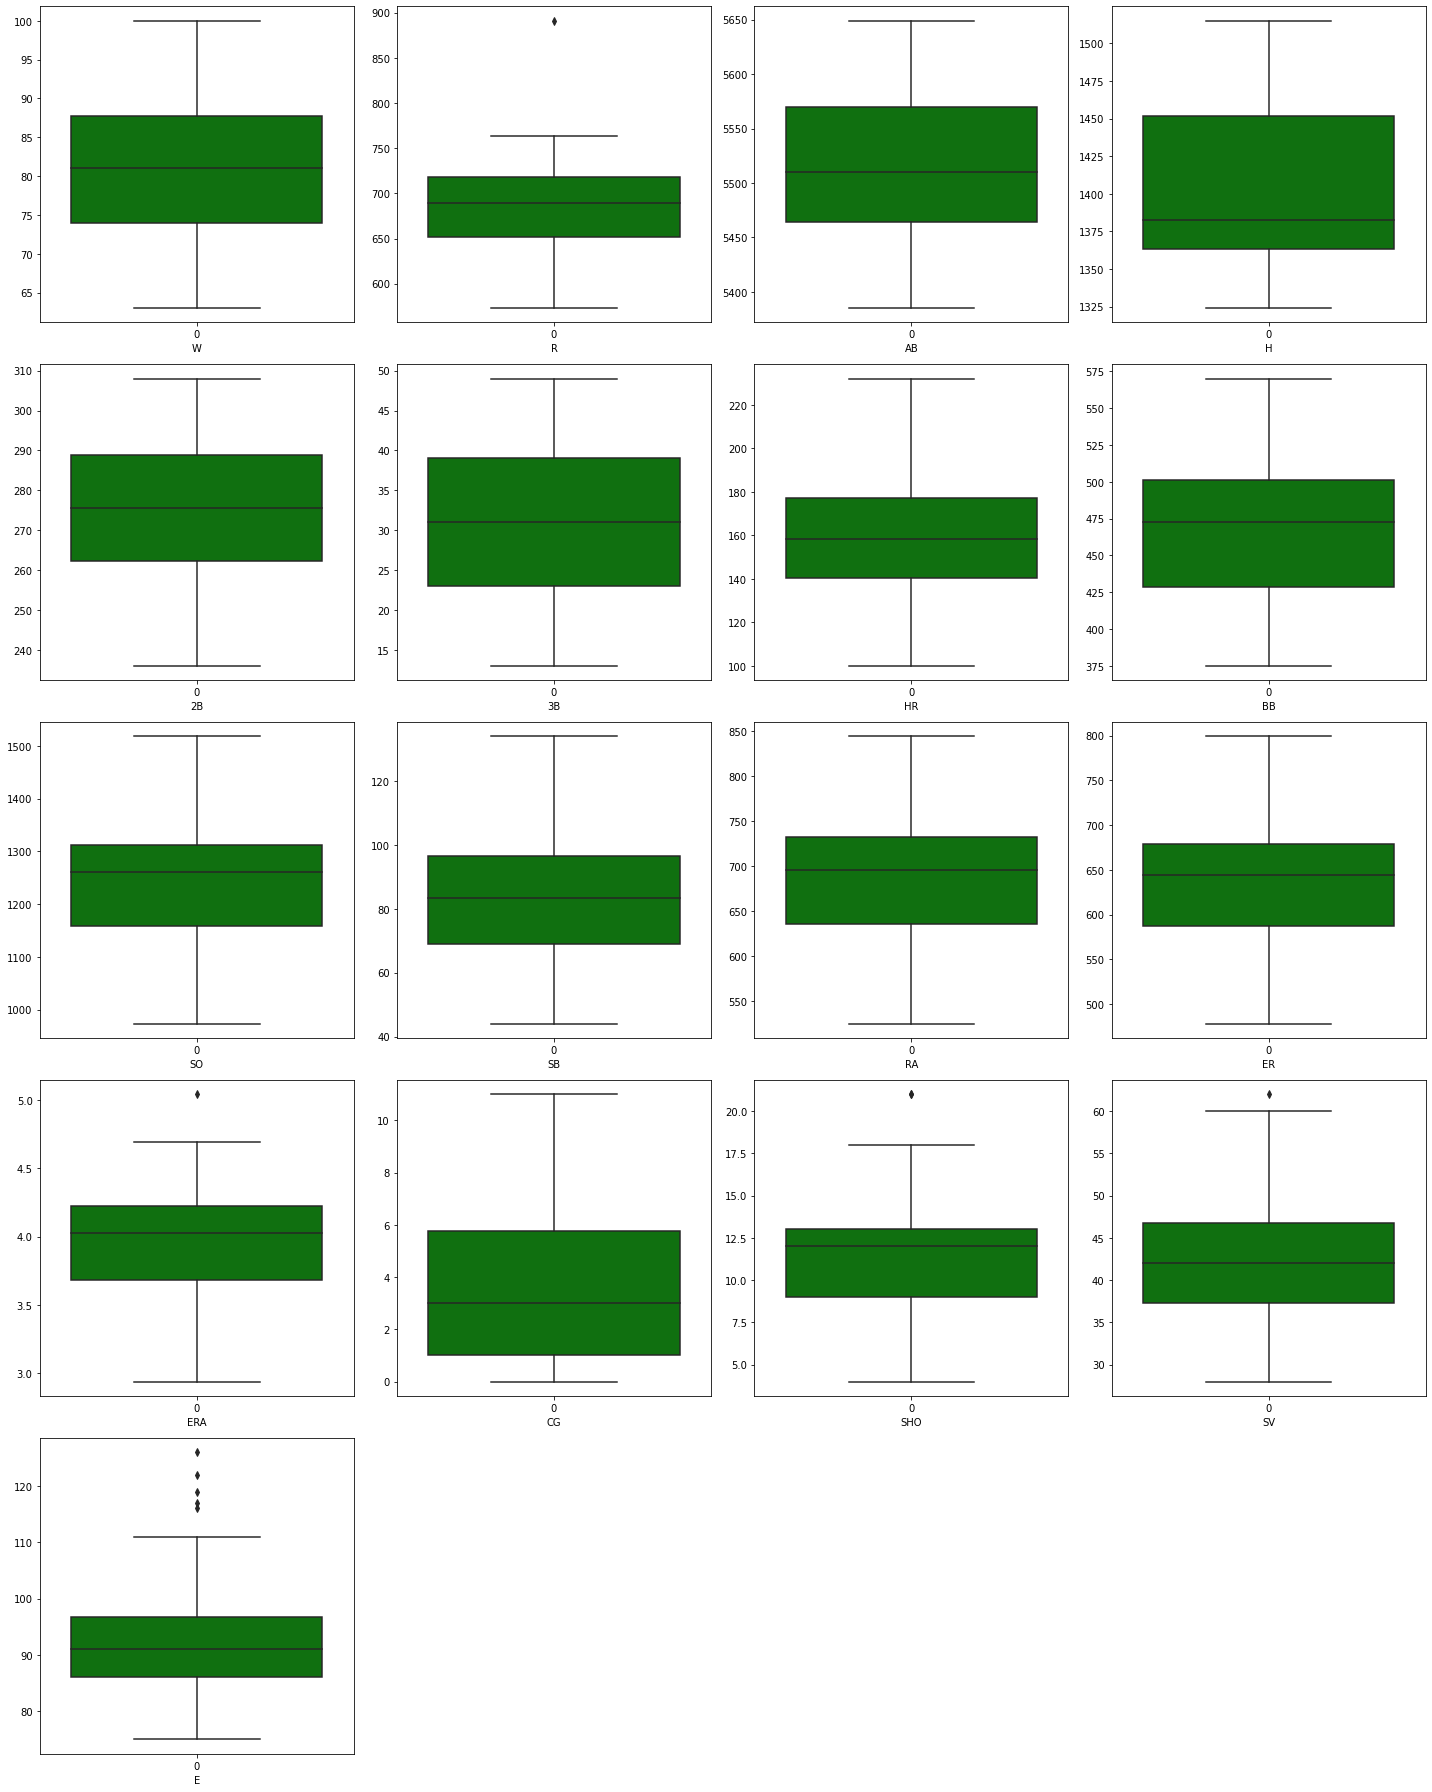

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

collist = data.columns.values
ncol = 4  # Number of columns in the plot grid
nrows = len(collist) // ncol + 1  # Calculate the number of rows based on the number of columns

plt.figure(figsize=(5 * ncol, 5 * nrows))  # Adjust the figure size based on the number of columns and rows

for i, column in enumerate(collist):
    plt.subplot(nrows, ncol, i + 1)
    sns.boxplot(data=data[column], color='green', orient='v')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()


In [21]:
import pandas as pd
# Calculate the correlation matrix
corr_matrix = df.corr()

# Iterate over the correlation matrix and print the results
for column in corr_matrix.columns:
    for index, value in corr_matrix[column].iteritems():
        if index != column:
            if value > 0.5:
                print(f"{column} and {index} are positively correlated: {value}")
            elif value < -0.5:
                print(f"{column} and {index} are negatively correlated: {value}")


W and RA are negatively correlated: -0.812951900423691
W and ER are negatively correlated: -0.8094347520763396
W and ERA are negatively correlated: -0.8195997123159472
W and SV are positively correlated: 0.6665296188226413
R and 2B are positively correlated: 0.560083890235868
R and HR are positively correlated: 0.6712833210483768
AB and H are positively correlated: 0.739122436302008
H and AB are positively correlated: 0.739122436302008
H and 2B are positively correlated: 0.5668465860966863
2B and R are positively correlated: 0.560083890235868
2B and H are positively correlated: 0.5668465860966863
HR and R are positively correlated: 0.6712833210483768
RA and W are negatively correlated: -0.812951900423691
RA and ER are positively correlated: 0.9910175705618053
RA and ERA are positively correlated: 0.9866742864799092
RA and SHO are negatively correlated: -0.6368622088748347
RA and SV are negatively correlated: -0.616223730268308
ER and W are negatively correlated: -0.8094347520763396
ER 

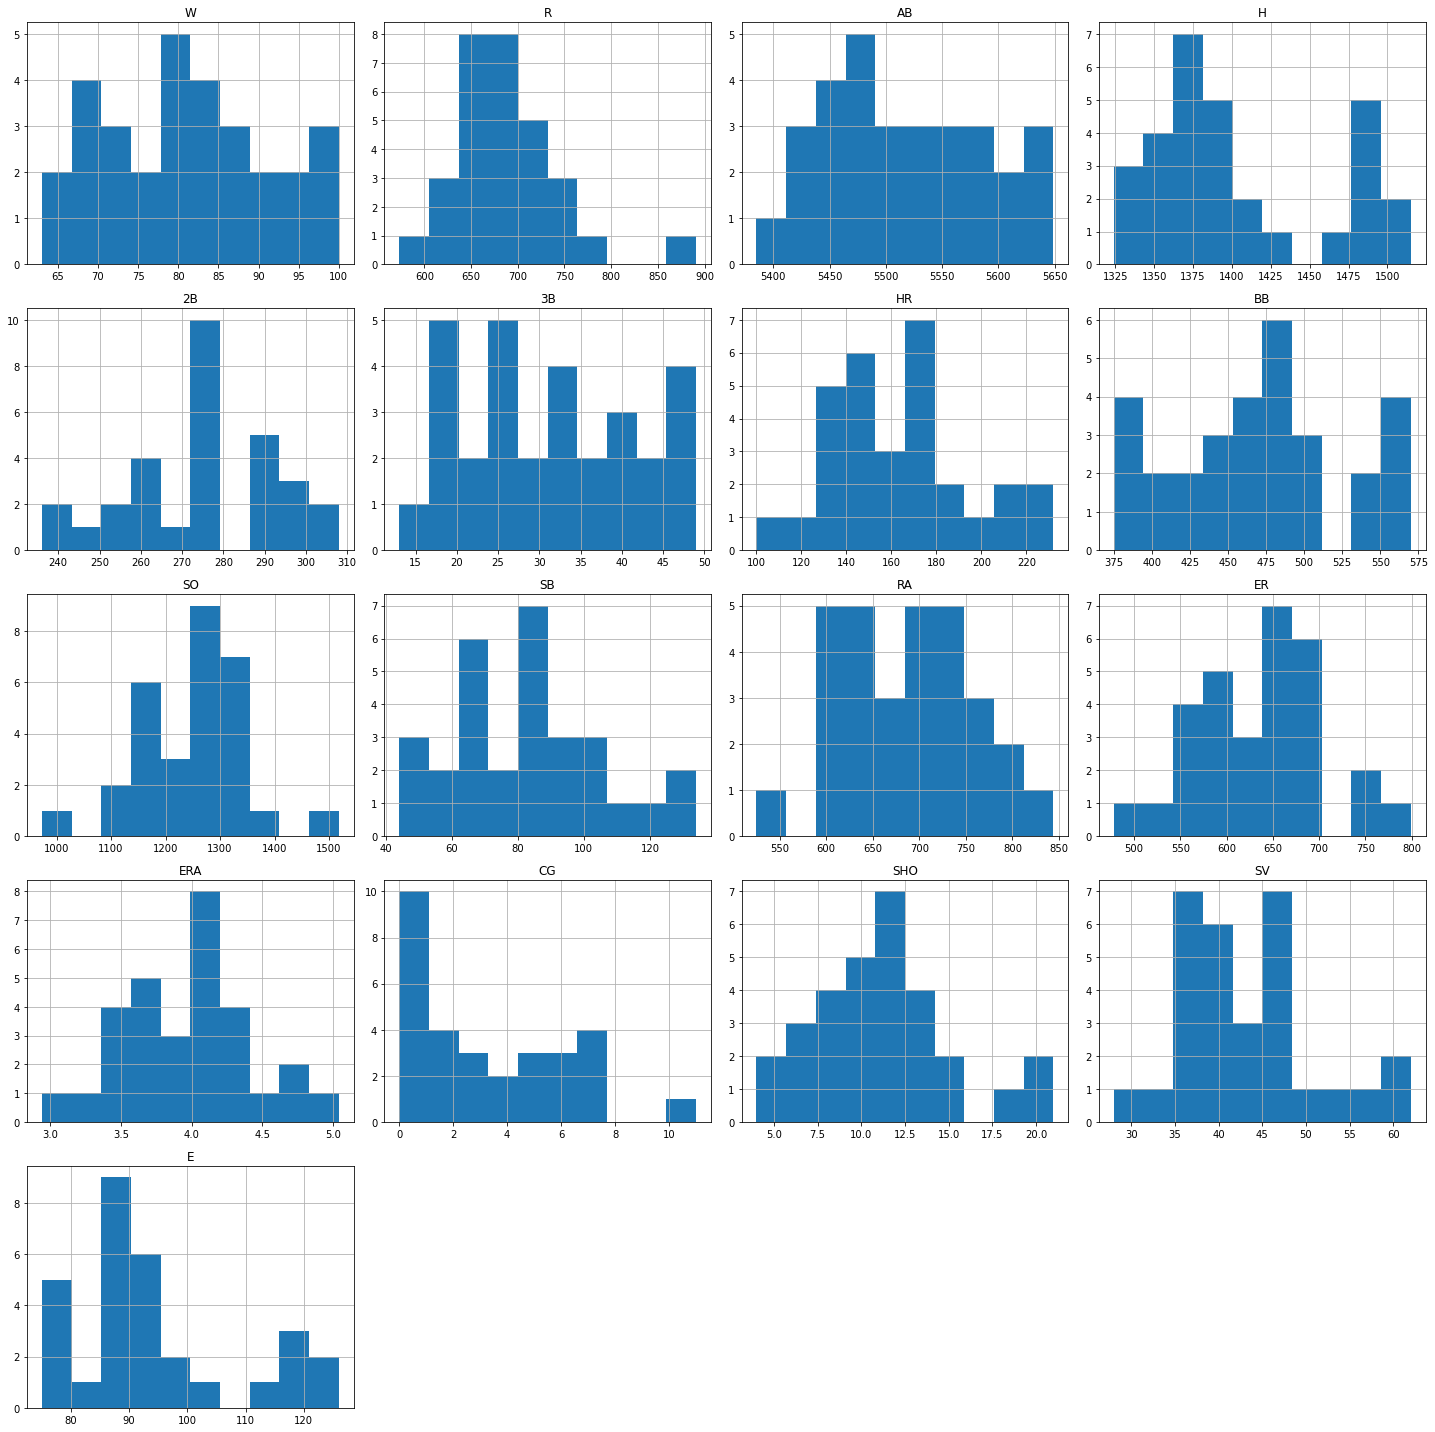

In [35]:
# Histograms
data.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

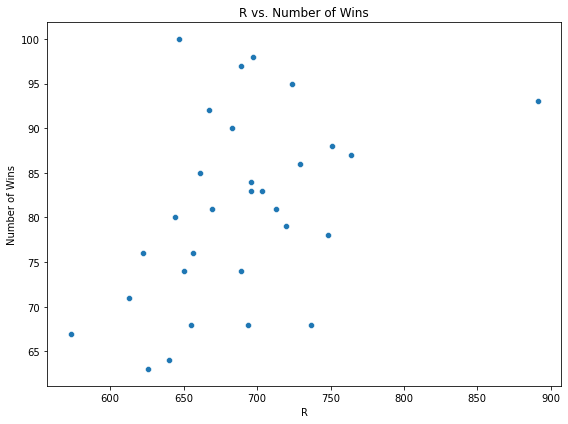

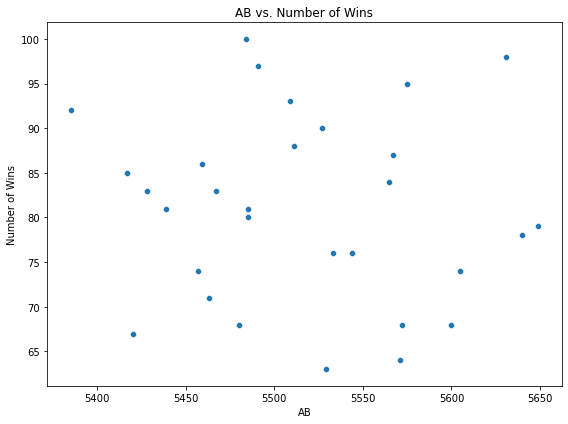

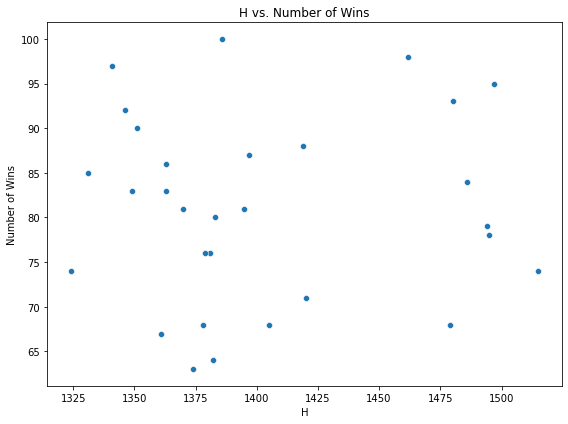

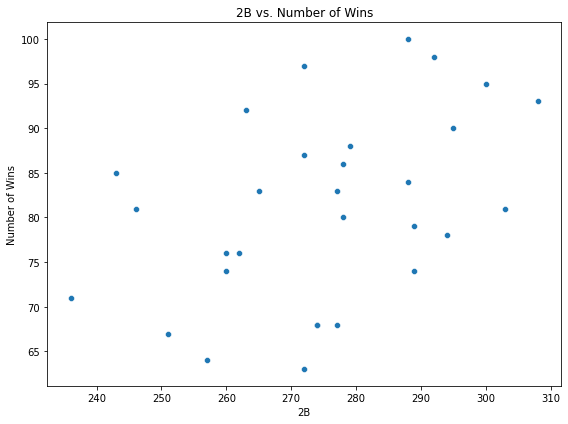

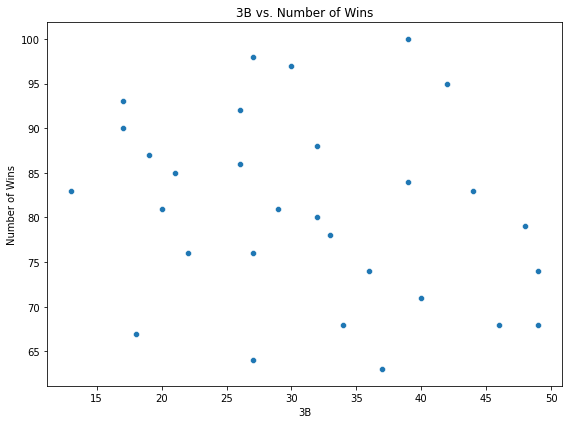

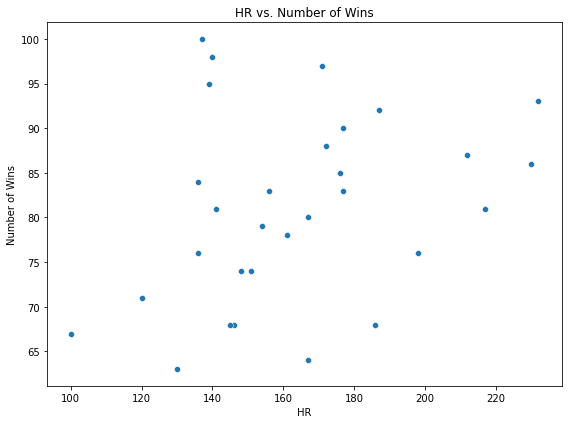

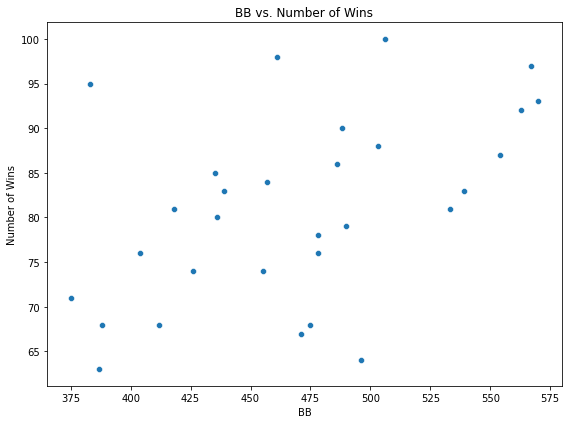

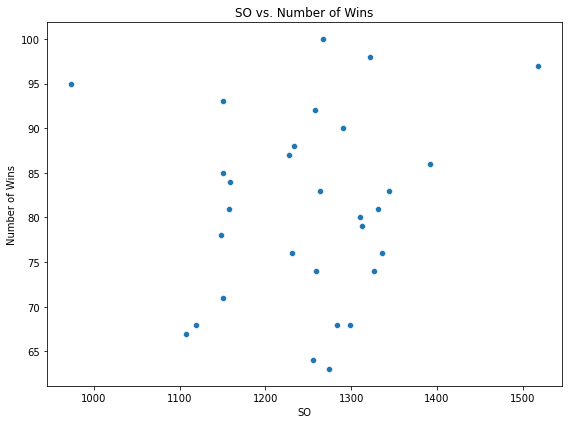

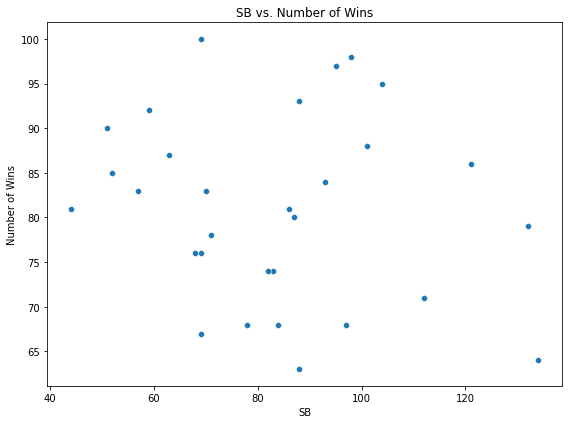

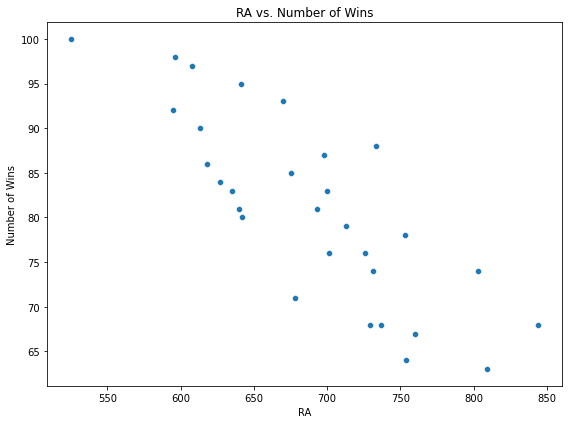

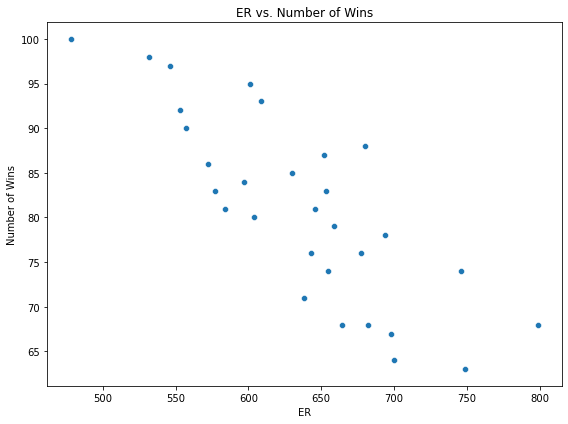

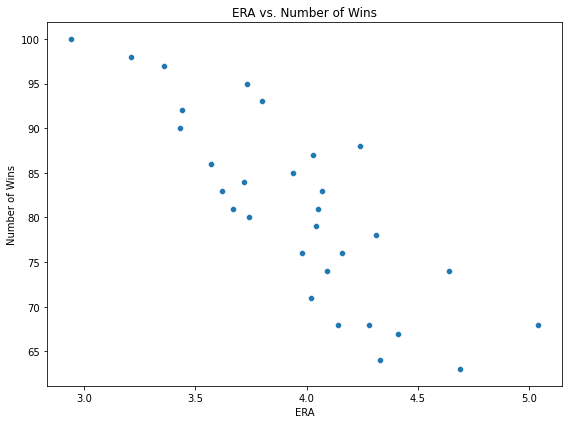

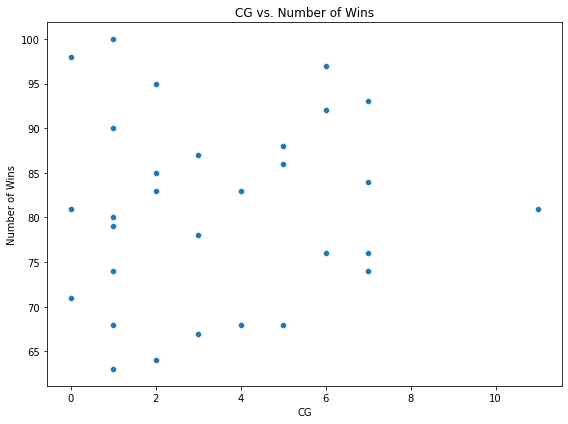

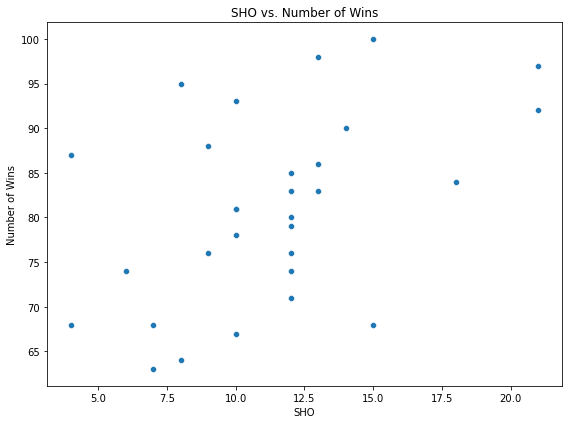

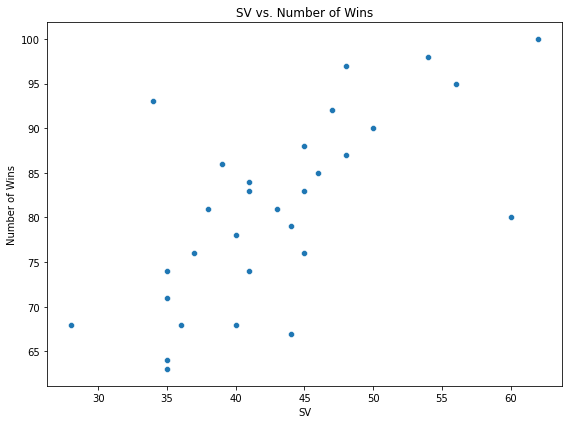

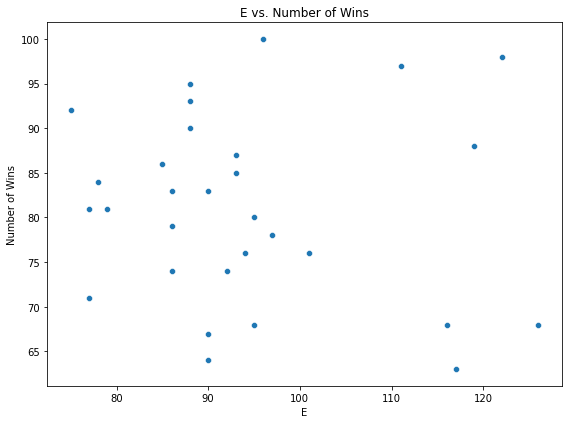

In [9]:
features = data.columns.drop('W')

# Plot scatter plot for each feature against the label
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='W', data=data)
    plt.xlabel(feature)
    plt.ylabel('Number of Wins')
    plt.title(f'{feature} vs. Number of Wins')
    plt.tight_layout()
    plt.show()


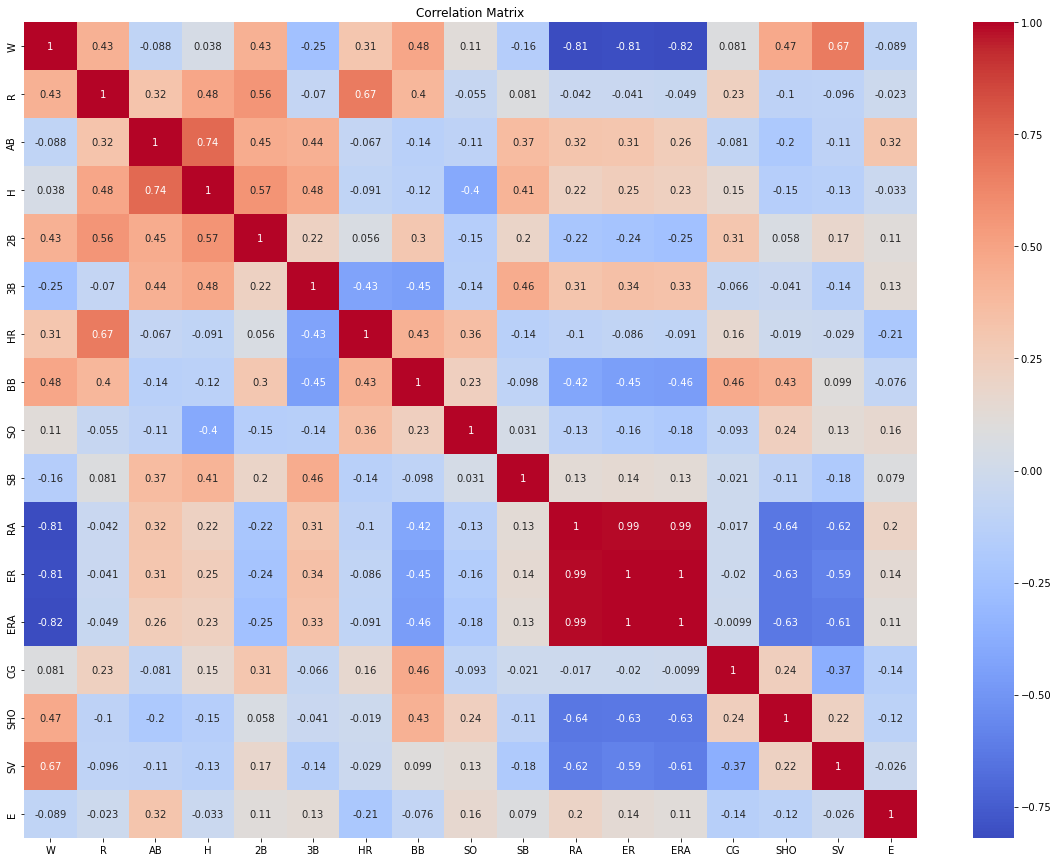

In [36]:
# plotting correlation heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:

# Create a scatter plot matrix
sns.pairplot(data)
plt.show()


In [31]:
correlation = data[['ER', 'ERA', 'RA']].corr()
print(correlation)


           ER       ERA        RA
ER   1.000000  0.997248  0.991018
ERA  0.997248  1.000000  0.986674
RA   0.991018  0.986674  1.000000


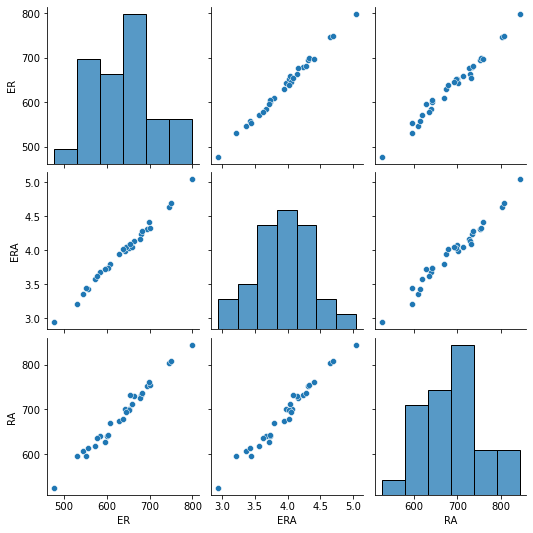

In [32]:
variables = ['ER', 'ERA', 'RA']

# Create a scatter plot matrix
sns.pairplot(data[variables])
plt.show()


In [33]:
# Drop the columns 'ER' and 'ERA'
data = data.drop(['ER', 'ERA'], axis=1)

# Verify the updated dataset
print(data.head())


    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA  CG  SHO  SV    E
0  95  724  5575  1497  300  42  139  383   973  104  641   2    8  56   88
1  83  696  5467  1349  277  44  156  439  1264   70  700   2   12  45   86
2  81  669  5439  1395  303  29  141  533  1157   86  640  11   10  38   79
3  76  622  5533  1381  260  27  136  404  1231   68  701   7    9  37  101
4  74  689  5605  1515  289  49  151  455  1259   83  803   7   12  35   86


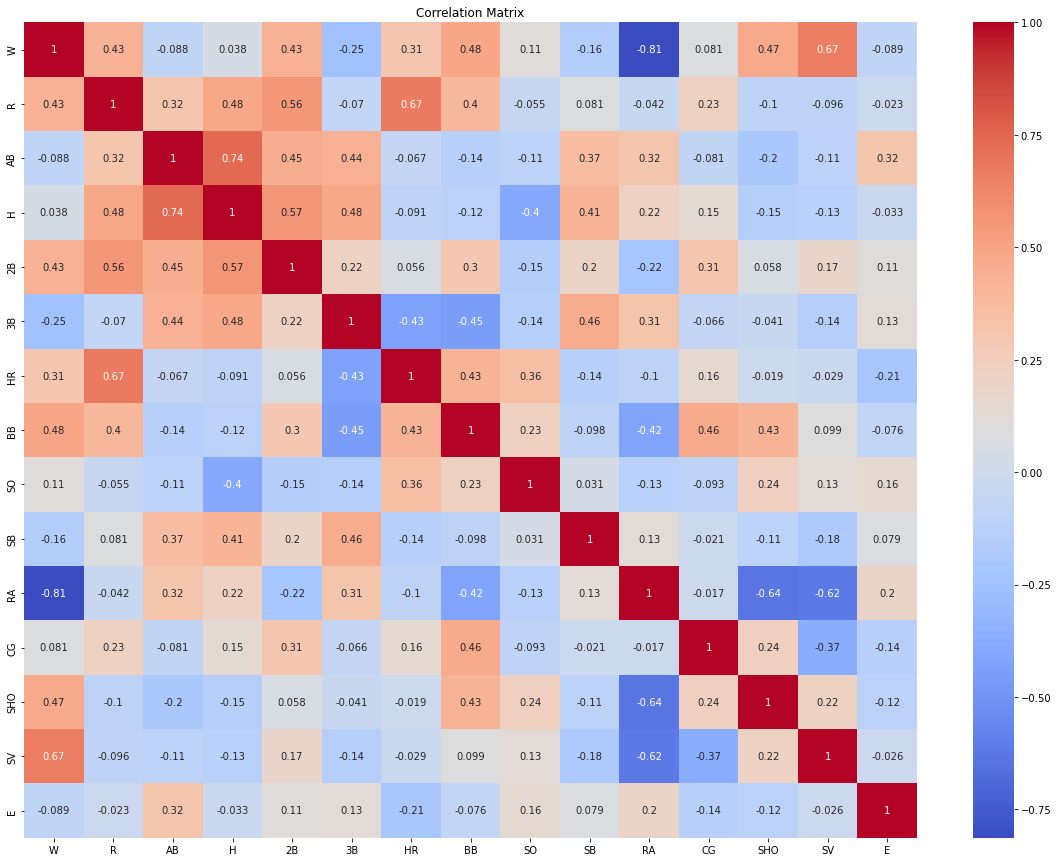

In [12]:
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [34]:
data.shape

(30, 15)

In [35]:
data.dtypes

W      int64
R      int64
AB     int64
H      int64
2B     int64
3B     int64
HR     int64
BB     int64
SO     int64
SB     int64
RA     int64
CG     int64
SHO    int64
SV     int64
E      int64
dtype: object

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Split the data into features (X) and target variable (y)
X = data.drop('W', axis=1)  # Assuming 'W' is the target variable
y = data['W']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose and instantiate the algorithm
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 27.94303250666688


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Instantiate the models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()
model_svr = SVR()
model_knn = KNeighborsRegressor()
model_xgb = xgb.XGBRegressor()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = data.drop('W', axis=1)  # Assuming 'W' is the target variable
y = data['W']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

models = [('Linear Regression', linear_model),
          ('Random Forest Regression', rf_model),
          ('Support Vector Regression', svr_model)]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared value for {model_name}: {r2}")

R-squared value for Linear Regression: 0.7876400316149446
R-squared value for Random Forest Regression: 0.6050569981000633
R-squared value for Support Vector Regression: -0.01514667425995686


In [8]:
# AS r squared value for linear regresssion is good so we will proceed ahead with linear regression model

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate residuals
residuals = y_test - y_pred

#Plot residuals (if desired)
# ...

# Check assumptions (if desired)
# ...



R-squared: 0.7876400316149446
Mean Squared Error: 27.94303250666688
Coefficients: [ 1.02549238e-01 -3.35827543e-02  2.01686535e-02 -6.00243719e-02
  1.60076245e-02 -2.77125187e-02 -2.17984971e-02 -1.34863493e-03
 -3.72563353e-03  6.65875468e-02  2.11546066e-01 -5.26256000e+01
  5.69017945e-01  3.04847981e-01  7.79908630e-01 -9.52477269e-03]
Intercept: 190.3985773774897


In [17]:
import joblib

In [20]:
joblib.dump(linear_model, "model_name")

['model_name']

In [21]:
model = joblib.load('model_name')

In [22]:
import pandas as pd

# Create a dictionary with the feature names and their corresponding values for the new data
new_data = {
    'R': [724],
    'AB': [5575],
    'H': [1497],
    '2B': [300],
    '3B': [42],
    'HR': [139],
    'BB': [383],
    'SO': [973],
    'SB': [104],
    'RA': [641],
    'ER': [601],
    'ERA': [3.73],
    'CG': [2],
    'SHO': [8],
    'SV': [56],
    'E': [88]
}

# Create a new DataFrame for prediction
new_data_df = pd.DataFrame(new_data)

# Print the new DataFrame
print(new_data_df)


     R    AB     H   2B  3B   HR   BB   SO   SB   RA   ER   ERA  CG  SHO  SV  \
0  724  5575  1497  300  42  139  383  973  104  641  601  3.73   2    8  56   

    E  
0  88  


In [23]:
model.predict(new_data_df)

array([96.31913949])

In [27]:
num_samples = 20

# Create random data for each feature within a certain range
np.random.seed(42)  # Set a seed for reproducibility

new_data = {
    'R': np.random.randint(600, 800, num_samples),
    'AB': np.random.randint(5000, 6000, num_samples),
    'H': np.random.randint(1200, 1600, num_samples),
    '2B': np.random.randint(200, 400, num_samples),
    '3B': np.random.randint(20, 60, num_samples),
    'HR': np.random.randint(100, 200, num_samples),
    'BB': np.random.randint(300, 500, num_samples),
    'SO': np.random.randint(800, 1200, num_samples),
    'SB': np.random.randint(50, 150, num_samples),
    'RA': np.random.randint(500, 700, num_samples),
    'ER': np.random.randint(400, 600, num_samples),
    'ERA': np.random.uniform(3.0, 4.5, num_samples),
    'CG': np.random.randint(0, 10, num_samples),
    'SHO': np.random.randint(0, 10, num_samples),
    'SV': np.random.randint(0, 100, num_samples),
    'E': np.random.randint(50, 100, num_samples)
}

# Create the DataFrame for prediction
new_data_df = pd.DataFrame(new_data)



In [28]:
new_data_df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,702,5343,1387,208,23,159,422,930,145,527,599,4.068406,5,0,18,95
1,779,5491,1470,289,48,140,304,1056,53,527,554,3.222130,0,8,47,67
2,692,5413,1389,252,37,128,340,804,143,607,536,4.496611,8,8,79,51
3,614,5805,1374,329,45,114,327,1017,72,543,461,3.400172,5,1,2,84
4,706,5385,1250,283,53,144,434,1054,64,583,564,4.464922,2,6,19,65
5,671,5191,1563,291,29,164,371,1197,92,529,450,3.616556,3,9,23,90
6,788,5955,1254,310,55,188,311,1158,78,689,571,3.049576,3,2,53,85
7,620,5276,1443,387,33,170,461,1082,85,574,551,3.517607,2,6,32,82
8,702,5160,1519,398,50,108,332,1192,62,627,458,3.951527,9,9,23,53
9,721,5459,1330,371,34,187,347,1006,81,591,517,4.021058,2,8,74,82


In [ ]:
#make prediction on new data

model.predict(new_data_df)

In [29]:
model.predict(new_data_df)

array([ 47.09683271, 108.00060246,  65.77228222,  13.82621448,
        16.24605556,  46.4410955 , 113.97297889,  63.47267339,
        40.5642698 ,  69.32401022, 106.51847886,  66.07927982,
        78.43570961,  73.449155  , 117.97103238, 128.04092287,
       124.80571883,  10.94197248,  88.91994985,  -9.17519459])